## Titanic EDA: Understanding Factors That Influenced Survival

## 1. Project Setup


## Step 1: Introduction
This notebook performs Exploratory Data Analysis (EDA) on the Titanic dataset to find which features affect survival.

## Step 2: Import Libraries
We import Pandas, Seaborn, and Matplotlib for analysis and visualization.


## 2. Load Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Understand the Data

In [4]:
# View first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Dataset size (rows, columns)
df.shape

(891, 12)

In [6]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Summary statistics for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Data Cleaning

In [8]:
#check missing values
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing data:

In [10]:
# Fill missing Age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

## 5. Exploratory Data Analysis(EDA)

### 5.1 Univariate Analysis (Single variable)

Count of survivors vs non-survivors

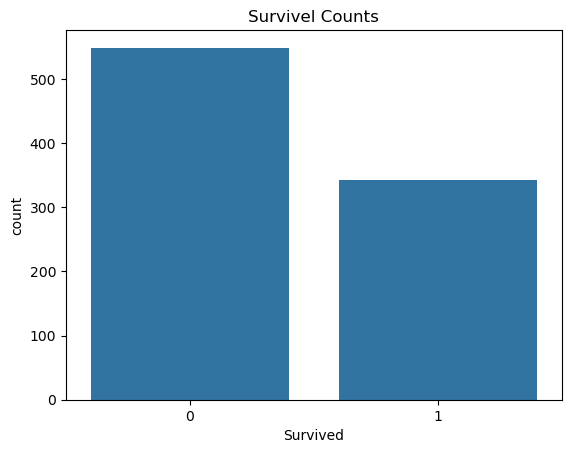

In [11]:
sns.countplot(x='Survived',data=df)
plt.title('Survivel Counts')
plt.show()

Distribution of Age

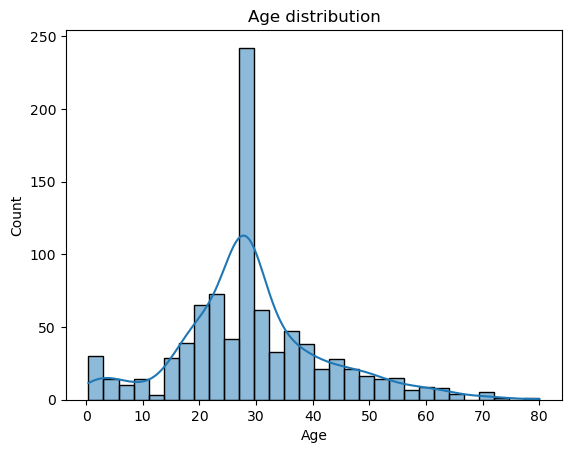

In [12]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age distribution')
plt.show()

Survival rate by Sex

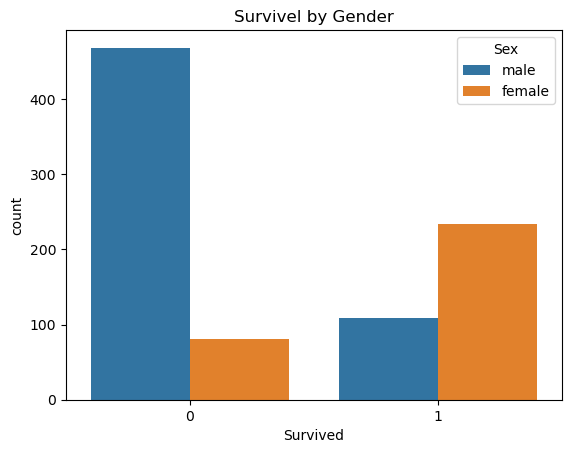

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survivel by Gender')
plt.show()

### 5.2 Bivariate Analysis (Relationship between two variables)

Survival rate by Passenger Class

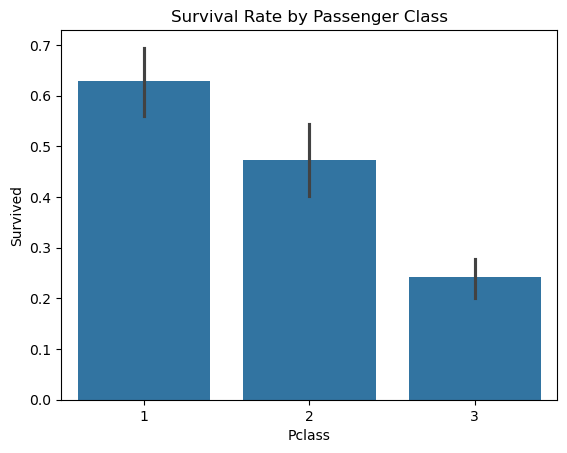

In [14]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

Age distribution by Survival

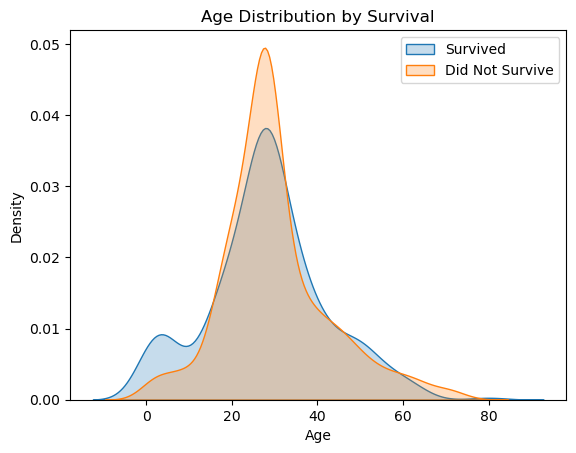

In [15]:
sns.kdeplot(df.loc[df['Survived']==1,'Age'],label='Survived',shade=True)
sns.kdeplot(df.loc[df['Survived']==0,'Age'],label='Did Not Survive',shade=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

Fare distribution by Survival

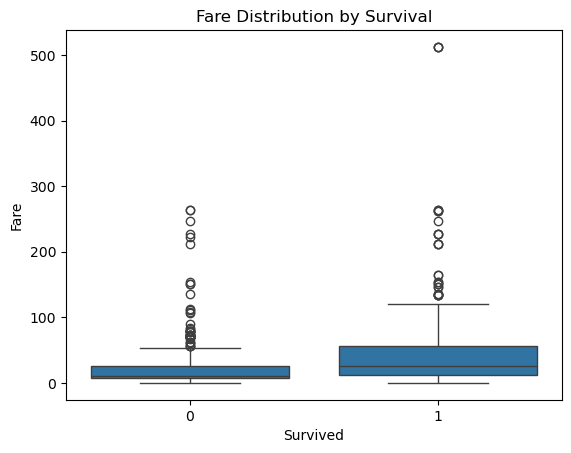

In [16]:
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title('Fare Distribution by Survival')
plt.show()


### 5.3 Multivariate Analysis (More than two variables)

Correlation heatmap

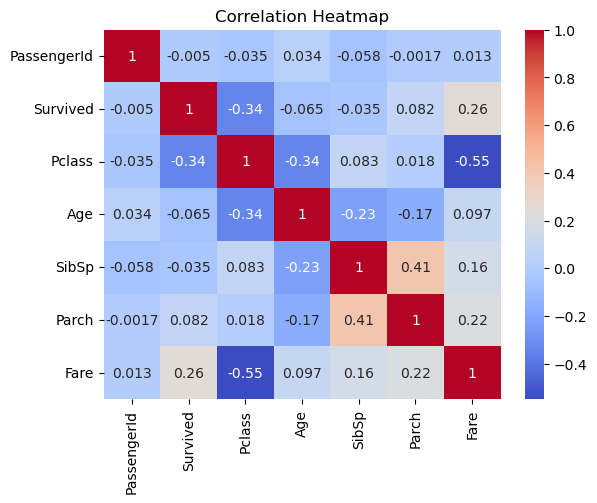

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 6.Feature Engineering(Optional)

Create new features if needed, e.g., FamilySize, IsAlone

In [18]:
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone']=1
df['IsAlone'].loc[df['FamilySize']>1]=0

## 7. Summary and Insights

### Summarize what you learned, e.g

--> Females had a higher survival rate
--> Higher class passengers had better survival chances
--> Younger passengers more likely survived
--> Fare paid correlates with survival

## 8.Optional: Save Cleaned Dataset

In [20]:
df.to_csv('titanic_cleaned.csv',index=False)

## 9.Conclusion

In [ ]:
--> This project analyzed the Titanic passenger data using EDA to identify key factors influencing survival,
             helping understand the tragic event from a data perspective.